In [101]:
using PyPlot
#using Distributions

In [24]:
function Estabilidad(m,s,v) #CARGAR SOLO LAS POSICIONES POSITIVAS

# m=HallaMasas(s)
# proveemos m=vetor de masas, s=vector de posiciones
#CARGAR SOLO LAS POSICIONES POSITIVAS
#v=linspace(10.3,	15.13,	1000), vector de posiciones iniciaeles

k=length(v)
a₁=Array{Complex{Float64}}(k)
a₂ =Array{Complex{Float64}}(k)
T =Array{Float64}(k)
Δ =Array{Complex{Float64}}(k)
for i=1:k
  a₁[i],a₂[i],T[i],Δ[i]=CoefEst(m,s,v[i])
end

    return (a₁, a₂, Δ, T)
end

#Asi se programa las funciones para el solver F(du, variable independet , param, var. indepent.)
function Fuerza3c(du,u,p,t)
    
    m=p[1]
    s=p[2]
  
  r = (s.^2 +u[1]^2).^(1.5)
  du[1] = u[2]
  du[2] = sum(m./r)*(-2*u[1])
  end

#Altura máxima de la partícula

function CoefEst(m,s,z₀)
    M=[1 0 0 0;0 -1 0 0; 0 0 -1 0;0 0 0 1]
    u1=eye(4)
#function CoefEst(v₀)
#Periodo de la partícula
  #E=v₀^2/2-2
#REVISAR
 r = (s.^2 +z₀^2).^(.5)

  E=-2*sum(m./r)
  #z₀=  v₀*sqrt(8-v₀^2 )/(4-v₀^2 )/2
f(z)=1/sqrt(E+2sum(m./sqrt.(s.^2+z^2)))

  #f(z)=1/sqrt(E+2m₁/sqrt(s₁^2+z^2)+2m₂/sqrt(s₂^2+z^2)) #-------
  T₀=quadgk(f,0,z₀-1e-10)
  T= T₀[1]/2^.5
  # Sistema no lineal


  u0 = [z₀,0.0]
  #u0 = [0,v₀]
  tspan = (0.0,T)

  prob_ode_trescuerpos = ODEProblem(Fuerza3c,u0,tspan,[m,s])
  sol = solve(prob_ode_trescuerpos,TsitPap8())
  #Matríz Variacional

  Φ(t)=s.^2+(sol(t)[1])^2

# REVISAR


F₂(t)=1-2*sum(m.*(Φ(t).^(-1.5)))
F₁(t)=F₂(t)+6*sum(m.*(s.^2.*Φ(t).^(-2.5)))



  A(t)=[0 0 1 0;0 0 0 1; F₁(t) 0 0 2; 0 F₂(t) -2 0 ]

#-------
  #Sistema Ecuaciones Variacionales
  variacional(u,p,t)=A(t)*u


  prob_ode_variacional = ODEProblem(variacional,u1,tspan)
  so_var = solve(prob_ode_variacional)
  #Matríz monodromía


  G=(M*inv(so_var(T))*M*so_var(T))^2
  #Coeficientes de estabilidad
  p=-trace(G)
  q=.5*(p^2-trace(G^2))

  Δ=sqrtm(p^2-4(q-2))

  a₁=.5*(p+Δ)
  a₂=.5*(p-Δ)
  return (a₁,a₂,T,Δ)
end
#

CoefEst (generic function with 2 methods)

In [31]:
aa=Estabilidad([1 2 3],[.1 .2 1],linspace(1,2,10))
aa

(Complex{Float64}[-2.89296+0.0im, -3.42919+0.0im, -4.27607+0.0im, -5.19479+0.0im, -6.60548+0.0im, -9.08168+0.0im, -12.3287+0.0im, -17.705+0.0im, -27.8809+0.0im, -40.0119+0.0im], Complex{Float64}[-633.372+0.0im, -624.577+0.0im, -571.477+0.0im, -539.611+0.0im, -454.472+0.0im, -401.838+0.0im, -304.528+0.0im, -235.281+0.0im, -177.793+0.0im, -123.877+0.0im], Complex{Float64}[630.479+0.0im, 621.148+0.0im, 567.201+0.0im, 534.417+0.0im, 447.867+0.0im, 392.757+0.0im, 292.199+0.0im, 217.576+0.0im, 149.912+0.0im, 83.8648+0.0im], [0.42359, 0.483169, 0.544683, 0.608144, 0.673572, 0.740974, 0.810355, 0.881709, 0.955024, 1.03028])

In [28]:
s=[.1 .2 1]
m=[1 2 3]
[m,s]

2-element Array{Array{Float64,2},1}:
 [1.0 2.0 3.0]
 [0.1 0.2 1.0]

In [32]:
bb=Estabilidad([2 2 3],[.1 .4 1],linspace(1,2,10))


(Complex{Float64}[-3.09131+0.0im, -3.51269+0.0im, -4.26414+0.0im, -5.38682+0.0im, -6.92434+0.0im, -8.98128+0.0im, -12.3303+0.0im, -17.0304+0.0im, -24.8088+0.0im, -39.2955+0.0im], Complex{Float64}[-1103.09+0.0im, -1115.33+0.0im, -983.947+0.0im, -934.788+0.0im, -815.813+0.0im, -661.667+0.0im, -550.821+0.0im, -404.399+0.0im, -300.471+0.0im, -224.058+0.0im], Complex{Float64}[1100.0+0.0im, 1111.81+0.0im, 979.683+0.0im, 929.401+0.0im, 808.888+0.0im, 652.686+0.0im, 538.491+0.0im, 387.369+0.0im, 275.662+0.0im, 184.762+0.0im], [0.392772, 0.447015, 0.503187, 0.561288, 0.621317, 0.683267, 0.747123, 0.812868, 0.880479, 0.949932])

In [20]:
m=[2 2 3]
s=[.1 .4 1]

1×3 Array{Float64,2}:
 0.1  0.4  1.0

In [90]:
#using Plots
#plotly()

In [6]:
function ColinealInv(x)
  #x vector fila de posiciones
  l=size(x)[2]
  D=ones(l,1)*x
  C=D-D'
  A=((abs.(C)).^(-3)).*C
  for i=1:l
    A[i,i]=0
  end
  return A\(-x')
end



ColinealInv (generic function with 1 method)

<h2> 6 cuerpos <h2>

In [41]:
n = 500
m = 500
x=linspace(.01,.99,n)
y=linspace(.01,.99,m)
A = [ ColinealInv([-1 -x1 -x1*y1 x1*y1 x1 1]) for x1 in x, y1 in y ]
z1=[~any(k->k<0,l) for l in A];
z=[Float64(l) for l in z1];


In [42]:
xgrid = repmat(x,1,size(y)[1])
ygrid = repmat(y',size(x)[1],1);


In [67]:
n1 = 6
m1 = 6
x=linspace(.01,.99,n1)
y=linspace(.01,.99,m1)
A = [ ColinealInv([-1 -x1 -x1*y1 x1*y1 x1 1]) for x1 in x, y1 in y ]
z1=[~any(k->k<0,l) for l in A];
xgrid1 = repmat(x,1,size(y)[1])
ygrid1 = repmat(y',size(x)[1],1);
Mp=A[z1];
Xp=xgrid1[z1]
Yp=ygrid1[z1]


Mp[10][4:6], Xp[1], Yp[1]

([0.213563, 0.0653168, 0.245242], 0.01, 0.01)

In [44]:
using DifferentialEquations, Plots, QuadGK

In [87]:
v=linspace(20,30,100)
bb=Array{Bool}(size(v)[1],1)
for i in 1:size(Xp)[1]
    (a₁,a₂,T,Δ)=Estabilidad(Mp[i][4:6],[Xp[i]*Yp[i] Xp[i] 1],v)
    aa=isreal.(Δ).*abs.(a₁).<=2.*abs.(a₂).<=2
    bb=hcat(bb,aa)    
end
cc=bb[:,2:size(Xp)[1]+1];
#cc=reshape(bb,size(v)[1],size(Xp)[1])

    
    
    

In [65]:
cc1=[Float64(l) for l in cc];


In [66]:
sum(l for l in cc1)

1.0

<h1> Testeo Rombo <h1>

In [96]:
#Problema tres cuerpos
#using OrdinaryDiffEq, Plots, QuadGK

# Three Body
function EstabilidadRombo(λ,v)


s=[λ,1]
m₂=4*(1+λ^2)^(3/2)*(8*λ^3-(1+λ^2)^(3/2))/(64*λ^3-(1+λ^2)^3)
m₁=4*λ^3*(1+λ^2)^(3/2)*(8-(1+λ^2)^(3/2))/(64*λ^3-(1+λ^2)^3)
m=[m₁,m₂]
k=length(v)
a₁=Array{Complex{Float64}}(k)
a₂ =Array{Complex{Float64}}(k)
T = Array{Float64}(k)
Δ =Array{Complex{Float64}}(k)
for i=1:k
  a₁[i],a₂[i],T[i],Δ[i]=CoefEstRombo(m,s,v[i])
end
    return (a₁,a₂,T,Δ)
end



function Fuerza3c(du,u,p,t)

    m=p[1]
    s=p[2]

  r = (s.^2 +u[1]^2).^(1.5)
  du[1] = u[2]
  du[2] = sum(m./r)*(-2*u[1])
  
  end
#Altura máxima de la partícula

function CoefEstRombo(m,s,z₀)
    M=[1 0 0 0;0 -1 0 0; 0 0 -1 0;0 0 0 1]
u1=eye(4)
#function CoefEst(v₀)
#Periodo de la partícula
  #E=v₀^2/2-2
r = (s.^2 +z₀^2).^(.5)
          E=-2*sum(m./r)

  #z₀=  v₀*sqrt(8-v₀^2 )/(4-v₀^2 )/2
f(z)=1/sqrt(E+2sum(m./sqrt.(s.^2+z^2)))
  T₀=quadgk(f,0,z₀-1e-10)
    
  T= T₀[1]/2^.5
  # Sistema no lineal


  u0 = [z₀,0.0]
  #u0 = [0,v₀]
  tspan = (0.0,T)
    
  prob_ode_trescuerpos = ODEProblem(Fuerza3c,u0,tspan,[m,s])
  
  sol = solve(prob_ode_trescuerpos)
  #Matríz Variacional
  # a=s[1]
  # b=s[2]
  # m₁=m[1]
  # m₂=m[2]
  # 
  # Φ₁(t)=a^2+(sol(t)[1])^2
  # Φ₂(t)=b^2+(sol(t)[1])^2
  # 
  # 
  # F₁(t)=1-2m₁*(-3a^2/Φ₁(t)^(5/2)+1/Φ₁(t)^(3/2))-2m₂/Φ₂(t)^(3/2)
  # F₂(t)= 1-2m₂*(-3b^2/Φ₂(t)^(5/2)+1/Φ₂(t)^(3/2))-2m₁/Φ₁(t)^(3/2)


  Φ(t)=s.^2+(sol(t)[1])^2

# REVISAR



F(t)=1-2*sum(m.*(Φ(t).^(-1.5)))

F₂(t)=F(t)+6*m[2]*s[2]^2*Φ(t)[2]^(-2.5)
F₁(t)=F(t)+6*m[1]*s[1]^2*Φ(t)[1]^(-2.5)





  A(t)=[0 0 1 0;0 0 0 1; F₁(t) 0 0 2; 0 F₂(t) -2 0 ]

  #Sistema Ecuaciones Variacionales
variacional(u,p,t)=A(t)*u


  prob_ode_variacional = ODEProblem(variacional,u1,tspan)
  so_var = solve(prob_ode_variacional)
  #Matríz monodromía

  G=(M*inv(so_var(T))*M*so_var(T))^2
  #Coeficientes de estabilidad
  p=-trace(G)
  q=.5*(p^2-trace(G^2))

  Δ=sqrtm(p^2-4(q-2))
# pensar definición a_1 y a_2 para que sean funciones suaves
  a₁=.5*(p+Δ)
  a₂=.5*(p-Δ)
  return (a₁,a₂,T,Δ)
end
#


CoefEstRombo (generic function with 1 method)

In [160]:
w=linspace(0.1,12,500)
aa=EstabilidadRombo(1.4,w)

(Complex{Float64}[0.0691427+0.0im, 0.0559238+0.0im, 0.0396831+0.0im, 0.0202904+0.0im, -0.00240749+0.0im, -0.0285887+0.0im, -0.0584573+0.0im, -0.092245+0.0im, -0.130212+0.0im, -0.172652+0.0im  …  1.85588+0.0im, 1.95057+0.0im, 1.99871+0.0im, 1.96757+0.0im, 1.82004+0.0im, 1.52106+0.0im, 1.50593+0.0im, 1.70745+0.0im, 1.84968+0.0im, 1.94093+0.0im], Complex{Float64}[-889.888+0.0im, -874.38+0.0im, -855.982+0.0im, -834.925+0.0im, -811.461+0.0im, -785.865+0.0im, -758.425+0.0im, -729.436+0.0im, -699.198+0.0im, -668.004+0.0im  …  -1.98783+0.0im, -1.08092+0.0im, -0.310642+0.0im, 0.319007+0.0im, 0.81615+0.0im, 1.19845+0.0im, 1.06114+0.0im, 0.396831+0.0im, -0.450538+0.0im, -1.46266+0.0im], [0.680717, 0.682597, 0.684873, 0.687542, 0.690601, 0.694046, 0.697874, 0.702081, 0.706662, 0.711614  …  17.6783, 17.7307, 17.7831, 17.8356, 17.8882, 17.9408, 17.9934, 18.0461, 18.0989, 18.1517], Complex{Float64}[889.957+0.0im, 874.436+0.0im, 856.022+0.0im, 834.945+0.0im, 811.459+0.0im, 785.837+0.0im, 758.367+0.0im

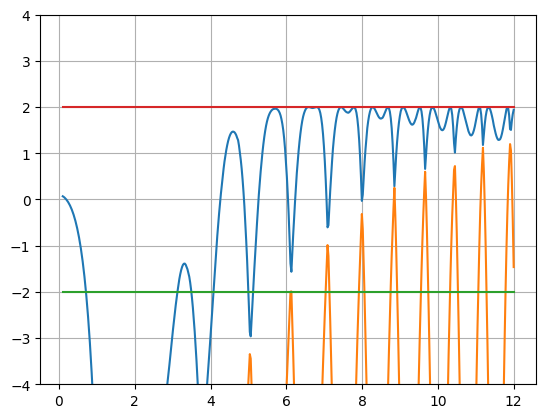

In [161]:
fig, ax=subplots()
ax[:plot](w,real(aa[1]))
ax[:plot](w,real(aa[2]))
ax[:plot](w,-2*ones(size(w)))
ax[:plot](w,2*ones(size(w)))
ylim(-4,4)
ax[:grid](2)


In [183]:
λ=linspace(1,sqrt(3),50)
v=linspace(0.1,12,500)
bb=Array{Bool}(size(v)[1],1)
for i in λ
    (a₁,a₂,T,Δ)=EstabilidadRombo(i,v)
    aa=isreal.(Δ).*(abs.(a₁).<=2).*(abs.(a₂).<=2)
    bb=hcat(bb,aa)    
end
cc=bb[:,2:size(λ)[1]+1];

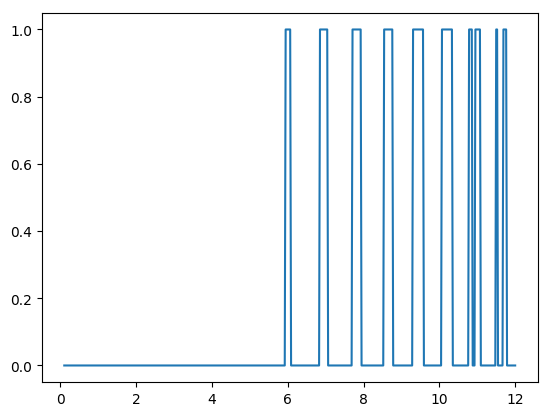

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3b5dacf990>

In [181]:
aa1=[Float64(b) for b in cc[:,5]]
fig, ax=subplots()

ax[:plot](v,aa1)

In [167]:
v=
(a₁,a₂,T,Δ)=EstabilidadRombo(λ[5],v);


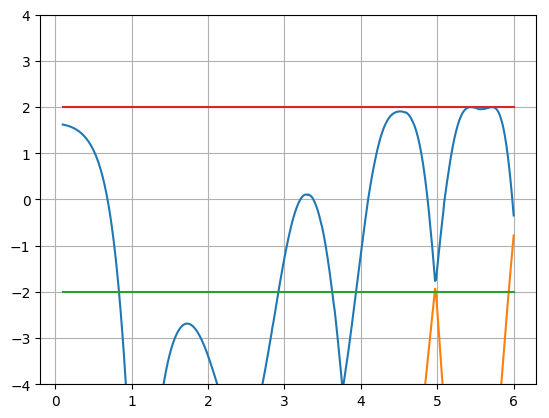

In [170]:
fig, ax=subplots()
ax[:plot](v,real(a₁))
ax[:plot](v,real(a₂))
ax[:plot](v,-2*ones(size(v)))
ax[:plot](v,2*ones(size(v)))
ylim(-4,4)
ax[:grid](2)

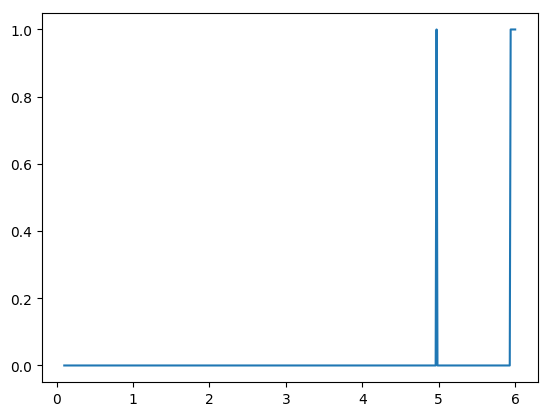

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3b5da559d0>

In [172]:
aa=(isreal.(Δ)).*(abs.(a₁).<=2).*(abs.(a₂).<=2)
aa1=[Float64(b) for b in aa]
fig, ax=subplots()

ax[:plot](v,aa1)

In [163]:
cc1=[Float64(l) for l in cc]
lambdagrid=repmat(λ,1,size(v)[1])
vgrid = repmat(v',size(λ)[1],1);

cc[:,1];


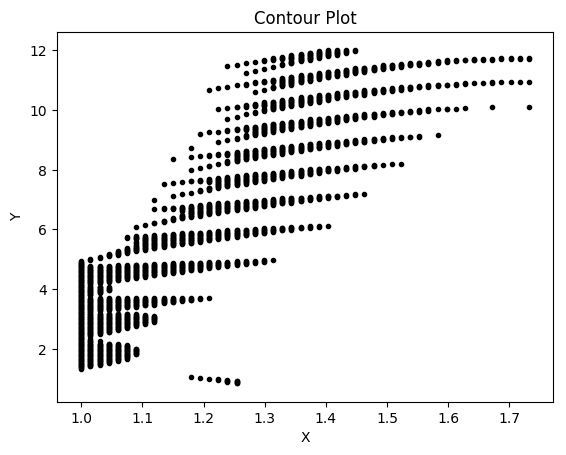

PyObject <matplotlib.text.Text object at 0x7f3b5df459d0>

In [184]:

fig, ax=subplots()

#ax[:contourf](lambdagrid,vgrid,  cc1', [0.5,1], colors="red", linewidth=2.0)
for i in 1:size(λ)[1]
    intest=v[cc[:,i]]
    λi=λ[i]*ones(size(intest))
    ax[:scatter](λi,intest,color="black", marker=:.)
end
    

xlabel("X")
ylabel("Y")

#ax[:text](.41,.41,L"p_1")


title("Contour Plot")

500-element Array{Bool,1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

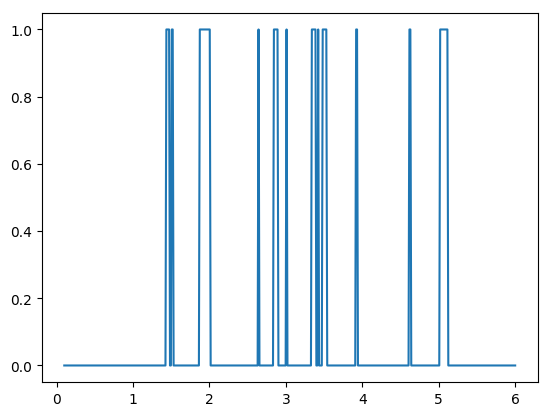

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3b5e9a1750>

In [141]:

fig, ax=subplots()

ax[:plot](v,cc1[:,1])

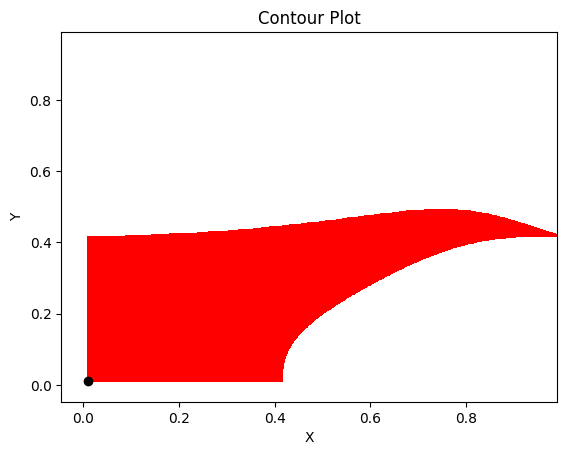

PyObject <matplotlib.text.Text object at 0x7f5a56918c10>

In [50]:

fig, ax=subplots()

ax[:contourf](xgrid, ygrid, z, [0.5,1], colors="red", linewidth=2.0)
xlabel("X")
ylabel("Y")
ax[:scatter](X1,Y1,color="black", marker=:o)
#ax[:text](.41,.41,L"p_1")


title("Contour Plot")

662

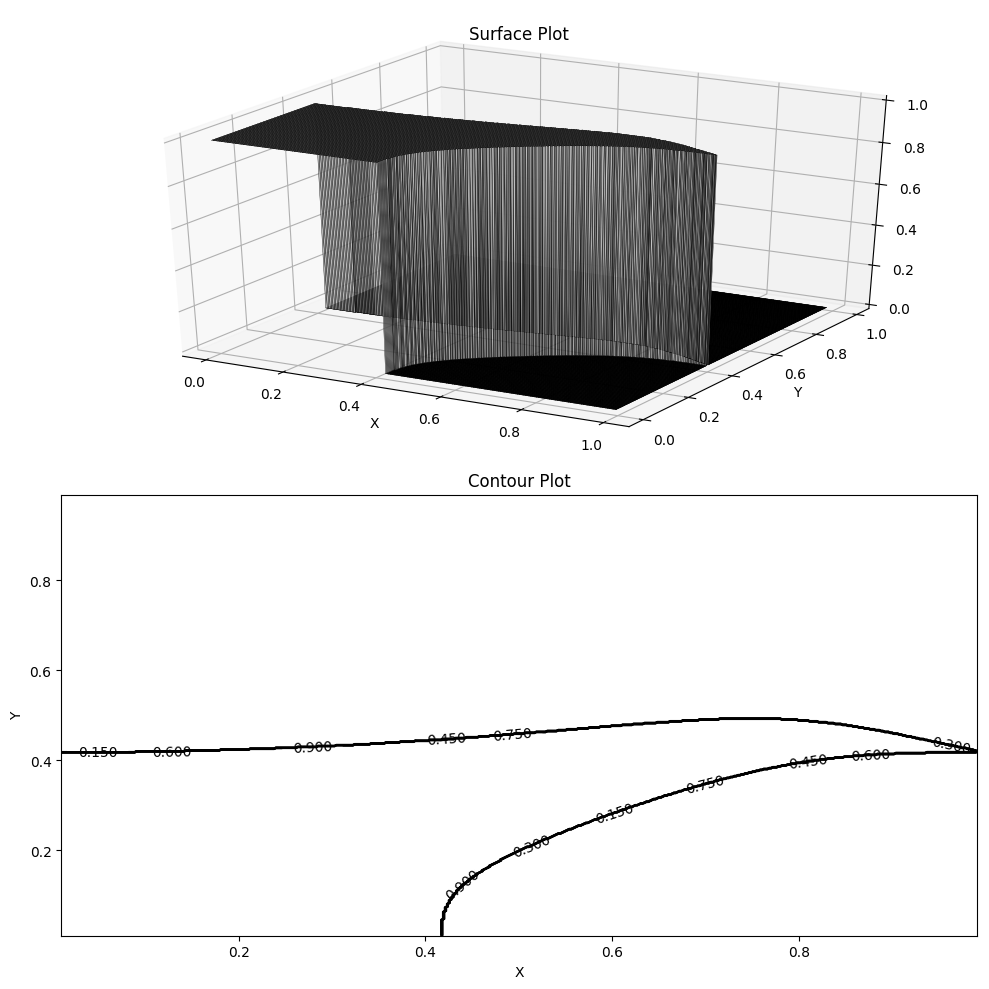

In [95]:


###################
##  Create Data  ##
###################



xgrid = repmat(x,1,m)
ygrid = repmat(y',n,1)





############
##  Plot  ##
############
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("Y")
title("Surface Plot")

subplot(212)
ax = fig[:add_subplot](2,1,2)
cp = ax[:contour](xgrid, ygrid, z, colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title("Contour Plot")
tight_layout()

In [96]:
size(x)[1]

500

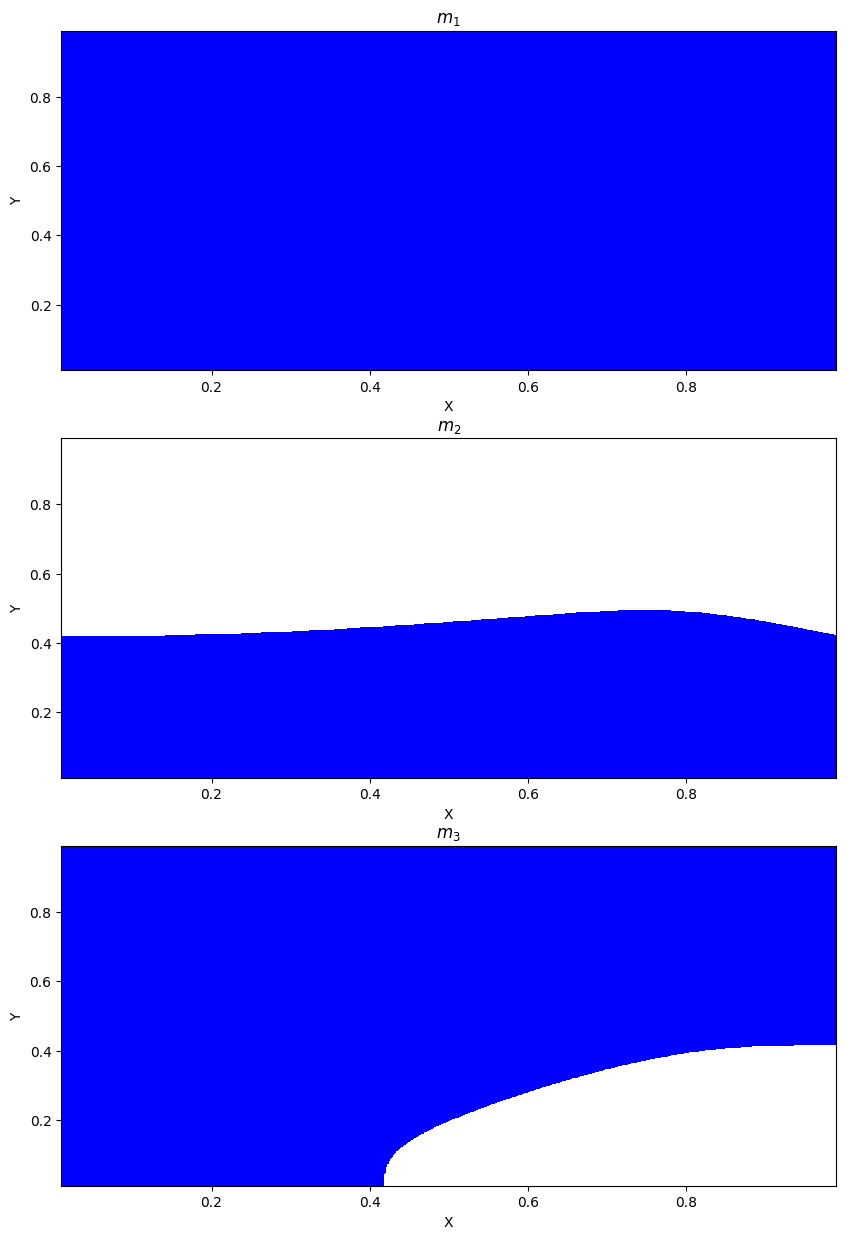

PyObject Text(0.5,1,u'$m_3$')

In [97]:
m₁=[k[4] for k in A];
m₂=[k[5] for k in A];
m₃=[k[6] for k in A];

z1=[Float64(~any(k->k<0,l)) for l in m₁];
z2=[Float64(~any(k->k<0,l)) for l in m₂];
z3=[Float64(~any(k->k<0,l)) for l in m₃];
z1[1,1]=0

fig = figure("pyplot_surfaceplot",figsize=(10,15))

subplot(311)
ax = fig[:add_subplot](3,1,1)
cp = ax[:contourf](xgrid, ygrid, z1,[0.5, 1], colors="blue", linewidth=2.0)
#ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title(L"m_1")


subplot(312)
ax = fig[:add_subplot](3,1,2)
cp = ax[:contourf](xgrid, ygrid, z2,[0.5, 1], colors="blue", linewidth=2.0)
#ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title(L"m_2")

subplot(313)
ax = fig[:add_subplot](3,1,3)
cp = ax[:contourf](xgrid, ygrid, z3,[0.5, 1], colors="blue", linewidth=2.0)
#x[:plot](0.5, 0.5,  colors="red", linewidth=2.0)
#ax[:clabel](cp, inline=1, fontsize=0.01)
xlabel("X")
ylabel("Y")
title(L"m_3")

#tight_layout()

In [99]:
fig, ax=subplots()

ax[:contourf](xgrid, ygrid, z, [0.5,1], colors="red", linewidth=2.0)
xlabel("X")
ylabel("Y")
ax[:scatter](.4,.4,color="black", marker=:o)
ax[:text](.41,.41,L"p_1")

ax[:scatter](.7,.4,color="black", marker=:o)
ax[:text](.71,.41,L"p_2")
title("Contour Plot")

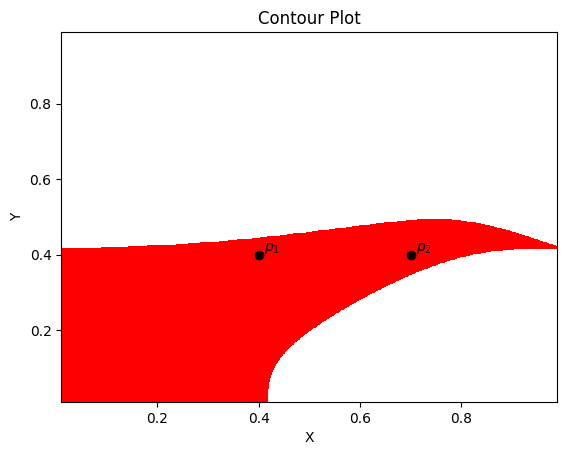

PyObject Text(0.5,1,u'Contour Plot')

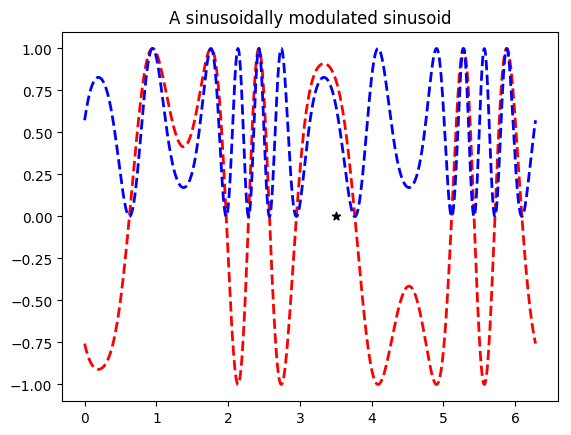

PyObject Text(0.5,1,u'A sinusoidally modulated sinusoid')

In [10]:
x = linspace(0,2*pi,1000); y = sin.(3 * x + 4 * cos.(2 * x));
fig, ax=subplots()
ax[:plot](x, y, color="red", linewidth=2.0, linestyle="--")
ax[:plot](x, y.^2, color="blue", linewidth=2.0, linestyle="--")
ax[:scatter](3.5,0,color="black", marker=:*)
title("A sinusoidally modulated sinusoid")

<h2> 8 cuerpos <h2>

In [10]:
n = 500
x=linspace(.01,.99,n)
y=linspace(.01,.99,n)
r=.1
A = [ ColinealInv([-1 -r -r*x1 -r*x1*y1 r*x1*y1 r*x1 r 1]) for x1 in x, y1 in y ]
z=[Float64(~any(k->k<0,l)) for l in A];


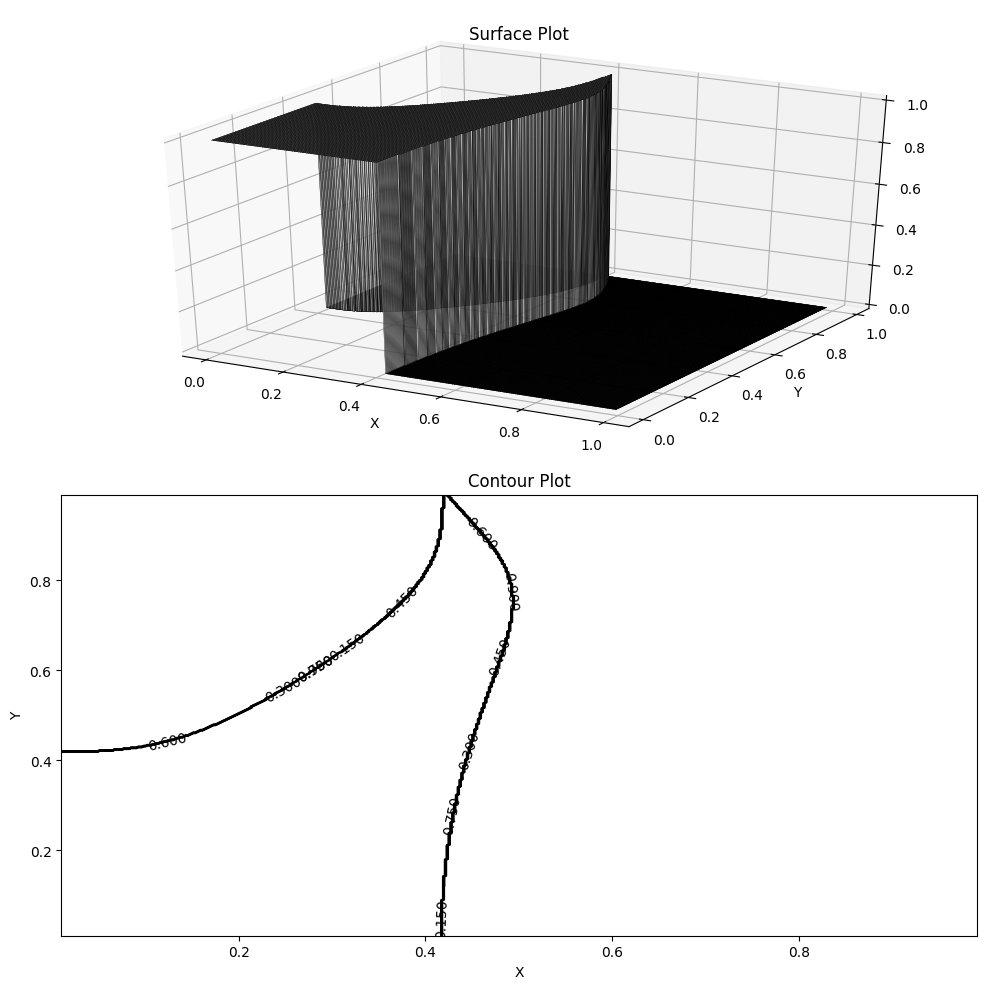

In [11]:

###################
##  Create Data  ##
###################



xgrid = repmat(x',n,1)
ygrid = repmat(y,1,n)





############
##  Plot  ##
############
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](2,1,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("Y")
title("Surface Plot")

subplot(212)
ax = fig[:add_subplot](2,1,2)
cp = ax[:contour](xgrid, ygrid, z, colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title("Contour Plot")
tight_layout()

<h2> 4 cuerpos <h2>

In [3]:

n = 500
x=linspace(0.01,0.99,n)
m = [ ColinealInv([-1 -x₁  x₁ 1]) for x₁ in x ]
z=[Float64(~any(k->k<0,l)) for l in m];

m₁=[a[1] for a in m]
m₂=[a[2] for a in m];


500-element Array{Float64,1}:
 6.80041e-5 
 0.000116453
 0.000183726
 0.000272904
 0.000387065
 0.000529278
 0.0007026  
 0.000910076
 0.00115473 
 0.00143957 
 0.00176758 
 0.0021417  
 0.00256486 
 ⋮          
 0.000998747
 0.000878475
 0.000765917
 0.000661072
 0.00056394 
 0.000474521
 0.000392817
 0.000318826
 0.000252548
 0.000193985
 0.000143135
 9.99999e-5 

In [9]:

plot(x,[m₁,m₂],title="Masses for collinear 4-body CC",label=[L"m_1" L"m_2"],lw=3)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 Masses for collinear 4-body CC 
 
<polyline clip-path="url(#clip5802)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 22.4386,31.4961 23.5566,31.5287 24.6746,31.5741 25.7926,31.6343 26.9106,31.7114 28.0286,31.8074 29.1465,31.9245 30.2645,32.0648 31.3825,32.2302 32.5005,32.4229 
 33.6185,32.645 34.7365,32.8984 35.8545,33.1852 36.9725,33.5074 38.0905,33.867 39.2084,34.2659 40.3264,34.7061 41.4444,35.1894 42.5624,35.7178 43.6804,36.293 
 44.7984,36.9168 45.9164,37.591 47.0344,38.3171 48.1524,39.0969 49.2703,39.9318 50.3883,40.8234 51.5063,41.773 52.6243,42.782 53.7423,43.8515 54.8603,44.9829 
 55.9783,46.177 57.0963,47.435 58.2143,48.7576 59.3322,50.1456 60.4502,51.5997 61.5682,53.1204 62.6862,54.7082 63.8042,56.3633 64.9222,58.0859 66.0402,59.8762 
 67.1582,61.7339 68.2762,63.6591 69.3941,65.6512 70.5121,67.71 71.6301,69.8347 72.7481,72.0248 73.8661,74.2794 74.9841,76.5976 76.1021,78.9782 77.2201,81.42 
 78.338,83.9219 79.456,86.4822 80.574,89.0996 81.692,91.7723 82.81,94.4986 83.928,97.2767 85.046,100.105 86.164,102.98 87.282,105.902 88.3999,108.866 
 89.5179,111.873 90.6359,114.918 91.7539,118 92.8719,121.116 93.9899,124.263 95.1079,127.44 96.2259,130.644 97.3439,133.873 98.4618,137.123 99.5798,140.392 
 100.698,143.678 101.816,146.978 102.934,150.29 104.052,153.611 105.17,156.939 106.288,160.272 107.406,163.606 108.524,166.94 109.642,170.272 110.76,173.599 
 111.878,176.919 112.996,180.23 114.114,183.529 115.232,186.816 116.35,190.087 117.468,193.342 118.586,196.578 119.704,199.794 120.822,202.988 121.94,206.159 
 123.058,209.305 124.176,212.424 125.294,215.516 126.412,218.579 127.53,221.612 128.648,224.614 129.766,227.584 130.884,230.522 132.002,233.425 133.119,236.294 
 134.237,239.127 135.355,241.925 136.473,244.686 137.591,247.41 138.709,250.097 139.827,252.745 140.945,255.356 142.063,257.928 143.181,260.461 144.299,262.956 
 145.417,265.411 146.535,267.827 147.653,270.204 148.771,272.542 149.889,274.841 151.007,277.101 152.125,279.322 153.243,281.505 154.361,283.648 155.479,285.754 
 156.597,287.821 157.715,289.851 158.833,291.843 159.951,293.797 161.069,295.715 162.187,297.596 163.305,299.442 164.423,301.251 165.541,303.025 166.659,304.764 
 167.777,306.468 168.895,308.139 170.013,309.775 171.131,311.379 172.249,312.95 173.367,314.488 174.485,315.995 175.603,317.47 176.721,318.914 177.839,320.328 
 178.957,321.713 180.075,323.067 181.193,324.393 182.311,325.69 183.429,326.96 184.547,328.202 185.665,329.417 186.783,330.605 187.901,331.767 189.019,332.904 
 190.137,334.016 191.255,335.103 192.373,336.166 193.491,337.205 194.609,338.22 195.727,339.213 196.845,340.184 197.963,341.133 199.081,342.06 200.199,342.966 
 201.317,343.851 202.435,344.716 203.553,345.561 204.671,346.387 205.789,347.193 206.907,347.981 208.025,348.751 209.143,349.502 210.261,350.236 211.379,350.953 
 212.497,351.653 213.615,352.337 214.733,353.004 215.851,353.656 216.969,354.292 218.087,354.913 219.205,355.519 220.323,356.111 221.441,356.688 222.559,357.252 
 223.677,357.802 224.795,358.338 225.913,358.862 227.031,359.373 228.149,359.871 229.267,360.357 230.385,360.831 231.502,361.294 232.62,361.745 233.738,362.184 
 234.856,362.613 235.974,363.031 237.092,363.439 238.21,363.836 239.328,364.223 240.446,364.601 241.564,364.969 242.682,365.327 243.8,365.676 244.918,366.017 
 246.036,366.348 247.154,366.671 248.272,366.985 249.39,367.291 250.508,367.59 251.626,367.88 252.744,368.162 253.862,368.437 254.98,368.705 256.098,368.965 
 257.216,369.218 258.334,369.464 259.452,369.704 260.57,369.937 261.688,370.163 262.806,370.383 263.924,370.597 265.042,370.805 266.16,371.006 267.278,371.202 
 268.396,371.393 269.514,371.577 270.632,371.757 271.75,371.931 272.868,372.099 273.986,372.263 275.104,372.422 276.222,372.576 277.34,372.725 278.458,372.

In [7]:
using LaTeXStrings

In [10]:
savefig( "/home/fernando/fer/Investigación/Trabajos GIT/Mecanica Celeste/Estabilidad Soluciones Periodicas Sitnikov Generalizado//figure1")

In [252]:
function asd(b,l)
    
    return zxc(b,2*b)
end

function zxc(u,v)
    
    c=u+v+l
    return c
end



zxc (generic function with 1 method)

In [253]:
asd(6,9)

LoadError: [91mUndefVarError: l not defined[39m

In [239]:
zxc(4,5)

10